<Figure size 1500x800 with 0 Axes>

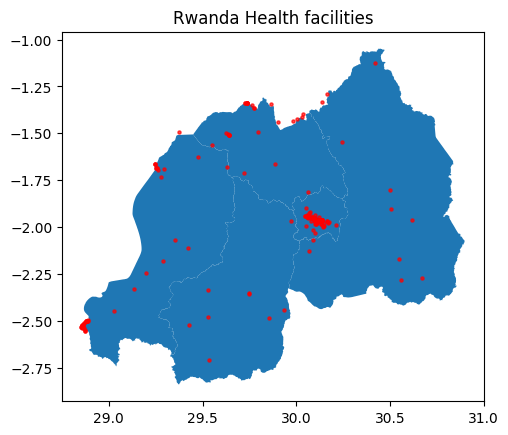

In [125]:
import geopandas as gpd
from matplotlib import pyplot as plt

facilities = gpd.read_file("hotosm_rwa_health_facilities_points_shp.shp")
provinces = gpd.read_file("province_sector_shapefile/rwa_provinces/geoBoundaries-RWA-ADM1.shp")

geometry = facilities['geometry']
x_coords = geometry.x 
y_coords = geometry.y  

plt.figure(figsize=(15,8))
provinces.plot()
plt.title('Rwanda Health facilities')

plt.scatter(x_coords, y_coords, color='red', label='Facilities',s=5, alpha=0.7)
plt.show()


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_21024\3597149226.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(amenity_types))


<Figure size 1500x800 with 0 Axes>

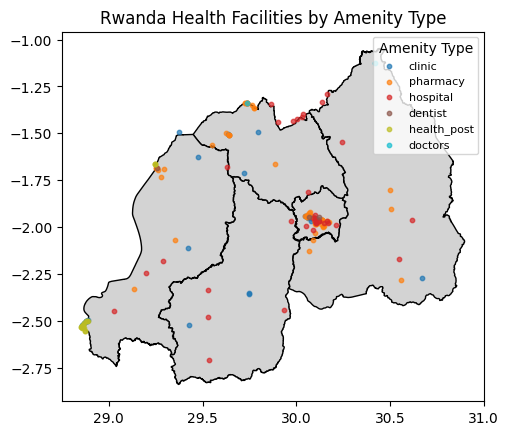

In [126]:
amenity_types = facilities['amenity'].unique()

colors = plt.cm.get_cmap('tab10', len(amenity_types))

plt.figure(figsize=(15, 8))
provinces.plot(color="lightgrey", edgecolor="black")
plt.title('Rwanda Health Facilities by Amenity Type')

for i, amenity in enumerate(amenity_types):
    subset = facilities[facilities['amenity'] == amenity]
    plt.scatter(subset.geometry.x, subset.geometry.y, 
                color=colors(i), label=amenity, s=10, alpha=0.7)

plt.legend(title="Amenity Type", fontsize=8, loc='upper right')
plt.show()



In [109]:
import pandas as pd
population_df = pd.read_excel("population_distribution.xlsx")
population_df.columns = ['Province/City', 'District', '2002 Population', '2012 Population', '2022 Population']

print("DataFrame Columns:", population_df.columns.tolist())
print(population_df.head())

for col in ['2002 Population', '2012 Population', '2022 Population']:
    population_df[col] = population_df[col].astype(str).str.replace(',', '').astype(int)


df_long = pd.melt(
    population_df,
    id_vars=['Province/City', 'District'],
    value_vars=['2002 Population', '2012 Population', '2022 Population'],
    var_name='Year',
    value_name='Population'
)

print("Long format preview:")
print(df_long.head(20))


DataFrame Columns: ['Province/City', 'District', '2002 Population', '2012 Population', '2022 Population']
  Province/City  District  2002 Population  2012 Population  2022 Population
0      Bugesera  District           266775           361914           551103
1       Gatsibo  District           283456           433020           551164
2       Kayonza  District           209723           344157           457156
3        Kirehe  District           229468           340368           460860
4         Ngoma  District           235109           336928           404048
Long format preview:
   Province/City  District             Year  Population
0       Bugesera  District  2002 Population      266775
1        Gatsibo  District  2002 Population      283456
2        Kayonza  District  2002 Population      209723
3         Kirehe  District  2002 Population      229468
4          Ngoma  District  2002 Population      235109
5      Nyagatare  District  2002 Population      255104
6      Rwamagana  D

In [110]:
sectors = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
sectors

,Prov_ID,Province,Dist_ID,District,Sect_ID,Name,geometry
0,1.0,Kigali City,11.0,Nyarugenge,1101.0,Gitega,"POLYGON ((505371.714 4785311.96, 505376.955 47..."
1,1.0,Kigali City,11.0,Nyarugenge,1102.0,Kanyinya,"POLYGON ((498847.14 4793516.119, 498839.366 47..."
2,1.0,Kigali City,11.0,Nyarugenge,1103.0,Kigali,"POLYGON ((504483.566 4785306.597, 504490.09 47..."
3,1.0,Kigali City,11.0,Nyarugenge,1104.0,Kimisagara,"POLYGON ((505001.967 4785564.824, 505007.375 4..."
4,1.0,Kigali City,11.0,Nyarugenge,1105.0,Mageregere,"POLYGON ((505814.263 4778683.386, 505819.771 4..."
...,...,...,...,...,...,...,...
411,5.0,Eastern Province,57.0,Bugesera,5711.0,Nyarugenge,"POLYGON ((503065.748 4749198.097, 503124.81 47..."
412,5.0,Eastern Province,57.0,Bugesera,5712.0,Rilima,"POLYGON ((519218.143 4766167.375, 519316.074 4..."
413,5.0,Eastern Province,57.0,Bugesera,5713.0,Ruhuha,"POLYGON ((510291.148 4747158.564, 510329.071 4..."
414,5.0,Eastern Province,57.0,Bugesera,5714.0,Rweru,"POLYGON ((535982.524 4756893.498, 535995.604 4..."


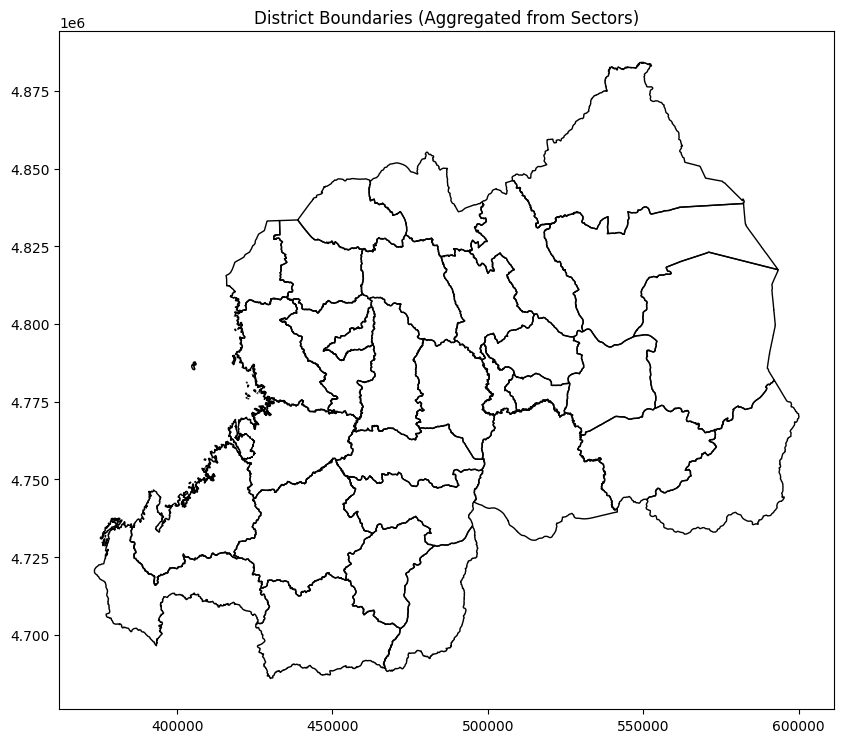

In [111]:
districts = sectors.dissolve(by='District')

districts = sectors.dissolve(by=['Province', 'District'], as_index=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
districts.plot(ax=ax, edgecolor='black', facecolor='none')
ax.set_title("District Boundaries (Aggregated from Sectors)")
plt.show()

Population Data Province/City:
['BUGESERA', 'BURERA', 'GAKENKE', 'GASABO', 'GATSIBO', 'GICUMBI', 'GISAGARA', 'HUYE', 'KAMONYI', 'KARONGI', 'KAYONZA', 'KICUKIRO', 'KIGALI', 'KIREHE', 'MUHANGA', 'MUSANZE', 'NGOMA', 'NGORORERO', 'NORTHERN', 'NYABIHU', 'NYAGATARE', 'NYAMAGABE', 'NYAMASHEKE', 'NYANZA', 'NYARUGENGE', 'NYARUGURU', 'RUBAVU', 'RUHANGO', 'RULINDO', 'RUSIZI', 'RUTSIRO', 'RWAMAGANA', 'RWANDA', 'SOUTHERN', 'WESTERN']
Shapefile District:
['BUGESERA', 'BURERA', 'GAKENKE', 'GASABO', 'GATSIBO', 'GICUMBI', 'GISAGARA', 'HUYE', 'KAMONYI', 'KARONGI', 'KAYONZA', 'KICUKIRO', 'KIREHE', 'MUHANGA', 'MUSANZE', 'NGOMA', 'NGORORERO', 'NYABIHU', 'NYAGATARE', 'NYAMAGABE', 'NYAMASHEKE', 'NYANZA', 'NYARUGENGE', 'NYARUGURU', 'RUBAVU', 'RUHANGO', 'RULINDO', 'RUSIZI', 'RUTSIRO', 'RWAMAGANA']
    District_x                                           geometry  Prov_ID  \
0     BUGESERA  POLYGON ((508029.202 4734627.506, 507853.839 4...      5.0   
1       BURERA  POLYGON ((481726.306 4827557.519, 481718.533

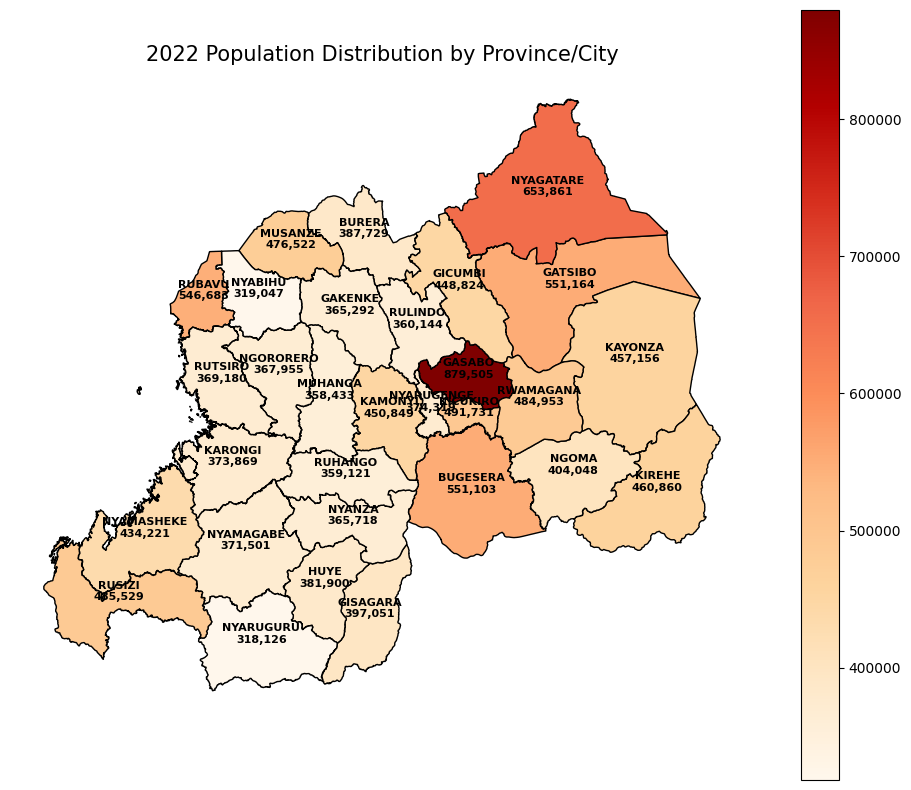

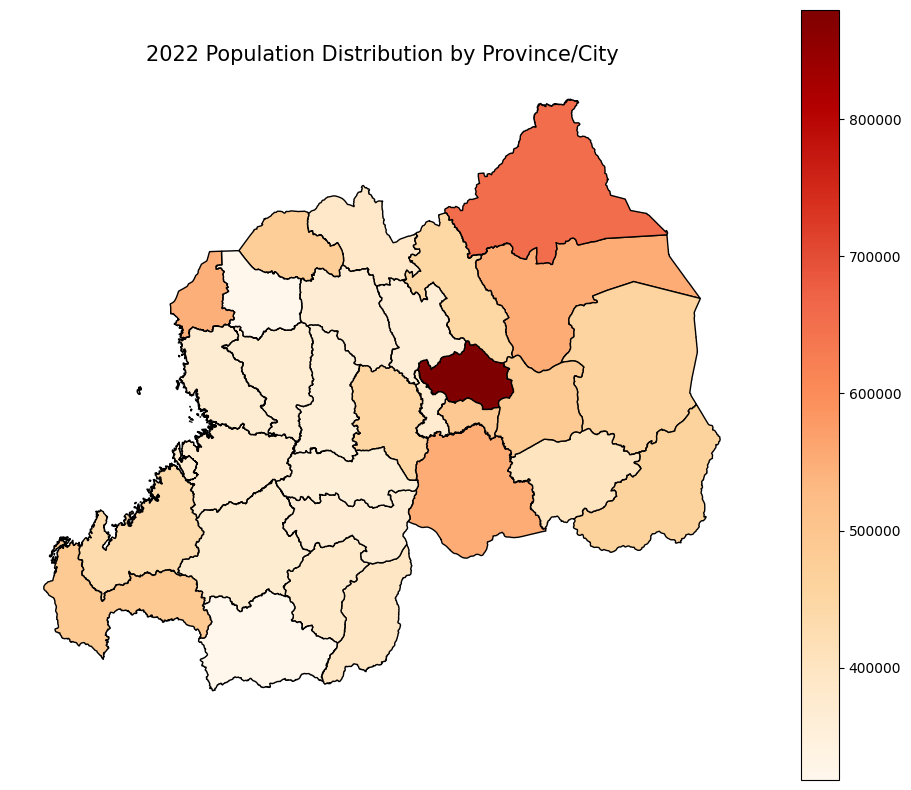

In [112]:

population_df = pd.read_excel("population_distribution.xlsx", engine="openpyxl")
population_df.columns = ['Province/City', 'District', '2002 Population', '2012 Population', '2022 Population']
for col in ['2002 Population', '2012 Population', '2022 Population']:
    population_df[col] = population_df[col].astype(str).str.replace(',', '').astype(int)
population_df['Province/City'] = population_df['Province/City'].str.strip().str.upper()
print("Population Data Province/City:")
print(sorted(population_df['Province/City'].unique()))

sectors = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
sectors['District'] = sectors['District'].str.strip().str.upper()
sectors['Province'] = sectors['Province'].str.strip().str.upper()
districts = sectors.dissolve(by='District', as_index=False)
print("Shapefile District:")
print(sorted(districts['District'].unique()))

merged = districts.merge(population_df, left_on='District', right_on='Province/City', how='left')
print(merged)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='2022 Population', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
for idx, row in merged.iterrows():
    centroid = row['geometry'].centroid
    district_name = row['District_x']
    pop_value = row['2022 Population']
    label = f"{district_name}\n{pop_value:,}"
    ax.annotate(label, xy=(centroid.x, centroid.y),
                horizontalalignment='center', fontsize=8,
                fontweight='bold', color='black')
ax.set_title("2022 Population Distribution by Province/City", fontsize=15)
ax.axis('off')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='2022 Population', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title("2022 Population Distribution by Province/City", fontsize=15)
ax.axis('off')
plt.show()

In [113]:


sectors = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
print("Original sectors columns:", sectors.columns.tolist())


Original sectors columns: ['Prov_ID', 'Province', 'Dist_ID', 'District', 'Sect_ID', 'Name', 'geometry']


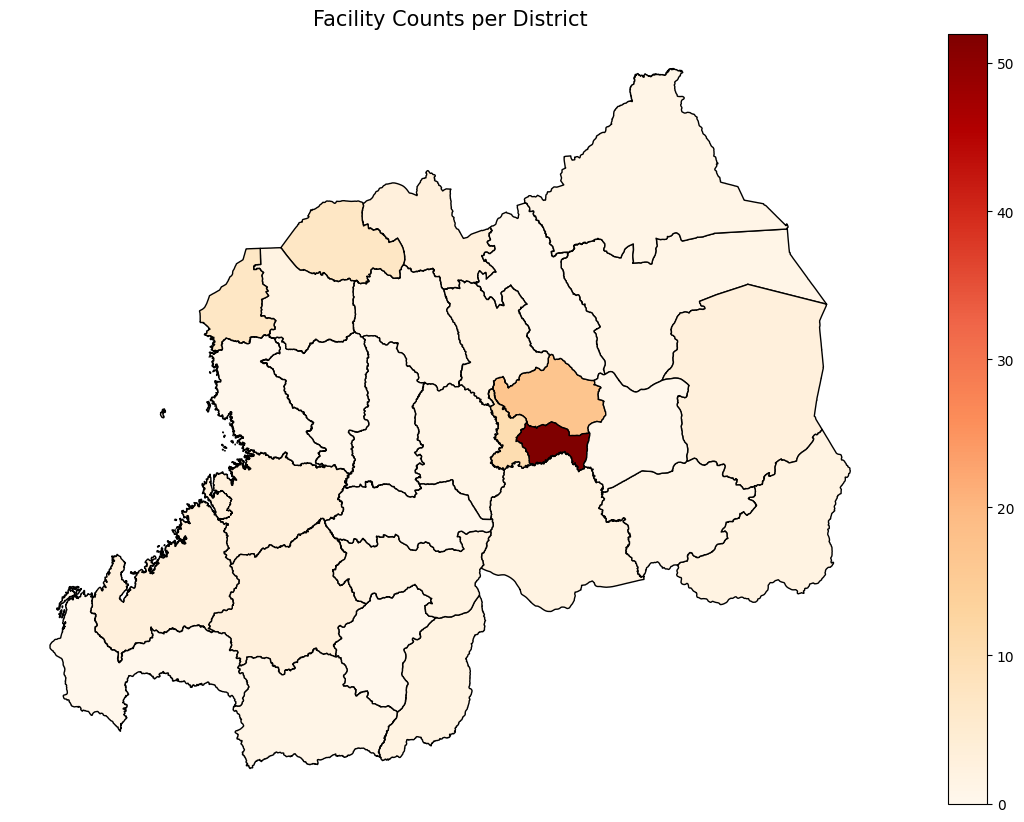

In [114]:

districts = sectors.dissolve(by='District', as_index=False)

if facilities.crs != districts.crs:
    facilities = facilities.to_crs(districts.crs)

facilities_in_district = gpd.sjoin(facilities, districts[['District', 'geometry']], how='left', predicate='within')

facility_counts = facilities_in_district.groupby('District').size().reset_index(name='facility_count')

districts_with_counts = districts.merge(facility_counts, on='District', how='left')
districts_with_counts['facility_count'] = districts_with_counts['facility_count'].fillna(0).astype(int)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
districts_with_counts.plot(column='facility_count', ax=ax, legend=True,
                             cmap='OrRd', edgecolor='black')
ax.set_title("Facility Counts per District", fontsize=15)
ax.axis('off')
plt.show()


Correlation between 2022 Population and Facility Count: 0.29629968568447873


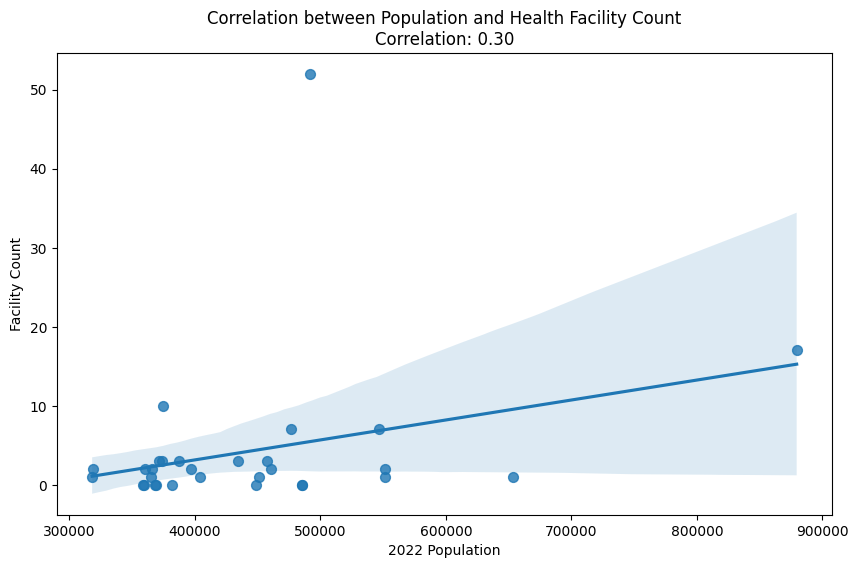

In [115]:
import seaborn as sns

# [Assuming the following have been already created:]
# 1. Districts dissolved from sectors, reprojected as necessary:
# sectors = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
# sectors['District'] = sectors['District'].str.strip().str.upper()
# districts = sectors.dissolve(by='District', as_index=False)

population_df = pd.read_excel("population_distribution.xlsx", engine="openpyxl")
population_df.columns = ['Province/City', 'District', '2002 Population', '2012 Population', '2022 Population']
for col in ['2002 Population', '2012 Population', '2022 Population']:
    population_df[col] = population_df[col].astype(str).str.replace(',', '').astype(int)
population_df['Province/City'] = population_df['Province/City'].str.strip().str.upper()

sectors = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
sectors['District'] = sectors['District'].str.strip().str.upper()
sectors['Province'] = sectors['Province'].str.strip().str.upper()
districts = sectors.dissolve(by='District', as_index=False)

merged = districts.merge(population_df, left_on='District', right_on='Province/City', how='left')

if 'District_x' in merged.columns:
    merged = merged.rename(columns={'District_x': 'District'})

if facilities.crs != districts.crs:
    facilities = facilities.to_crs(districts.crs)
facilities_in_district = gpd.sjoin(facilities, districts[['District', 'geometry']], how='left', predicate='within')
facility_counts = facilities_in_district.groupby('District').size().reset_index(name='facility_count')
districts_with_counts = districts.merge(facility_counts, on='District', how='left')
districts_with_counts['facility_count'] = districts_with_counts['facility_count'].fillna(0).astype(int)

corr_df = merged.merge(districts_with_counts[['District', 'facility_count']], on='District', how='left')
corr_df['facility_count'] = corr_df['facility_count'].fillna(0).astype(int)

corr_value = corr_df['2022 Population'].corr(corr_df['facility_count'])
print("Correlation between 2022 Population and Facility Count:", corr_value)

plt.figure(figsize=(10, 6))
sns.regplot(x='2022 Population', y='facility_count', data=corr_df, scatter_kws={'s':50})
plt.title(f'Correlation between Population and Health Facility Count\nCorrelation: {corr_value:.2f}')
plt.xlabel('2022 Population')
plt.ylabel('Facility Count')
plt.show()


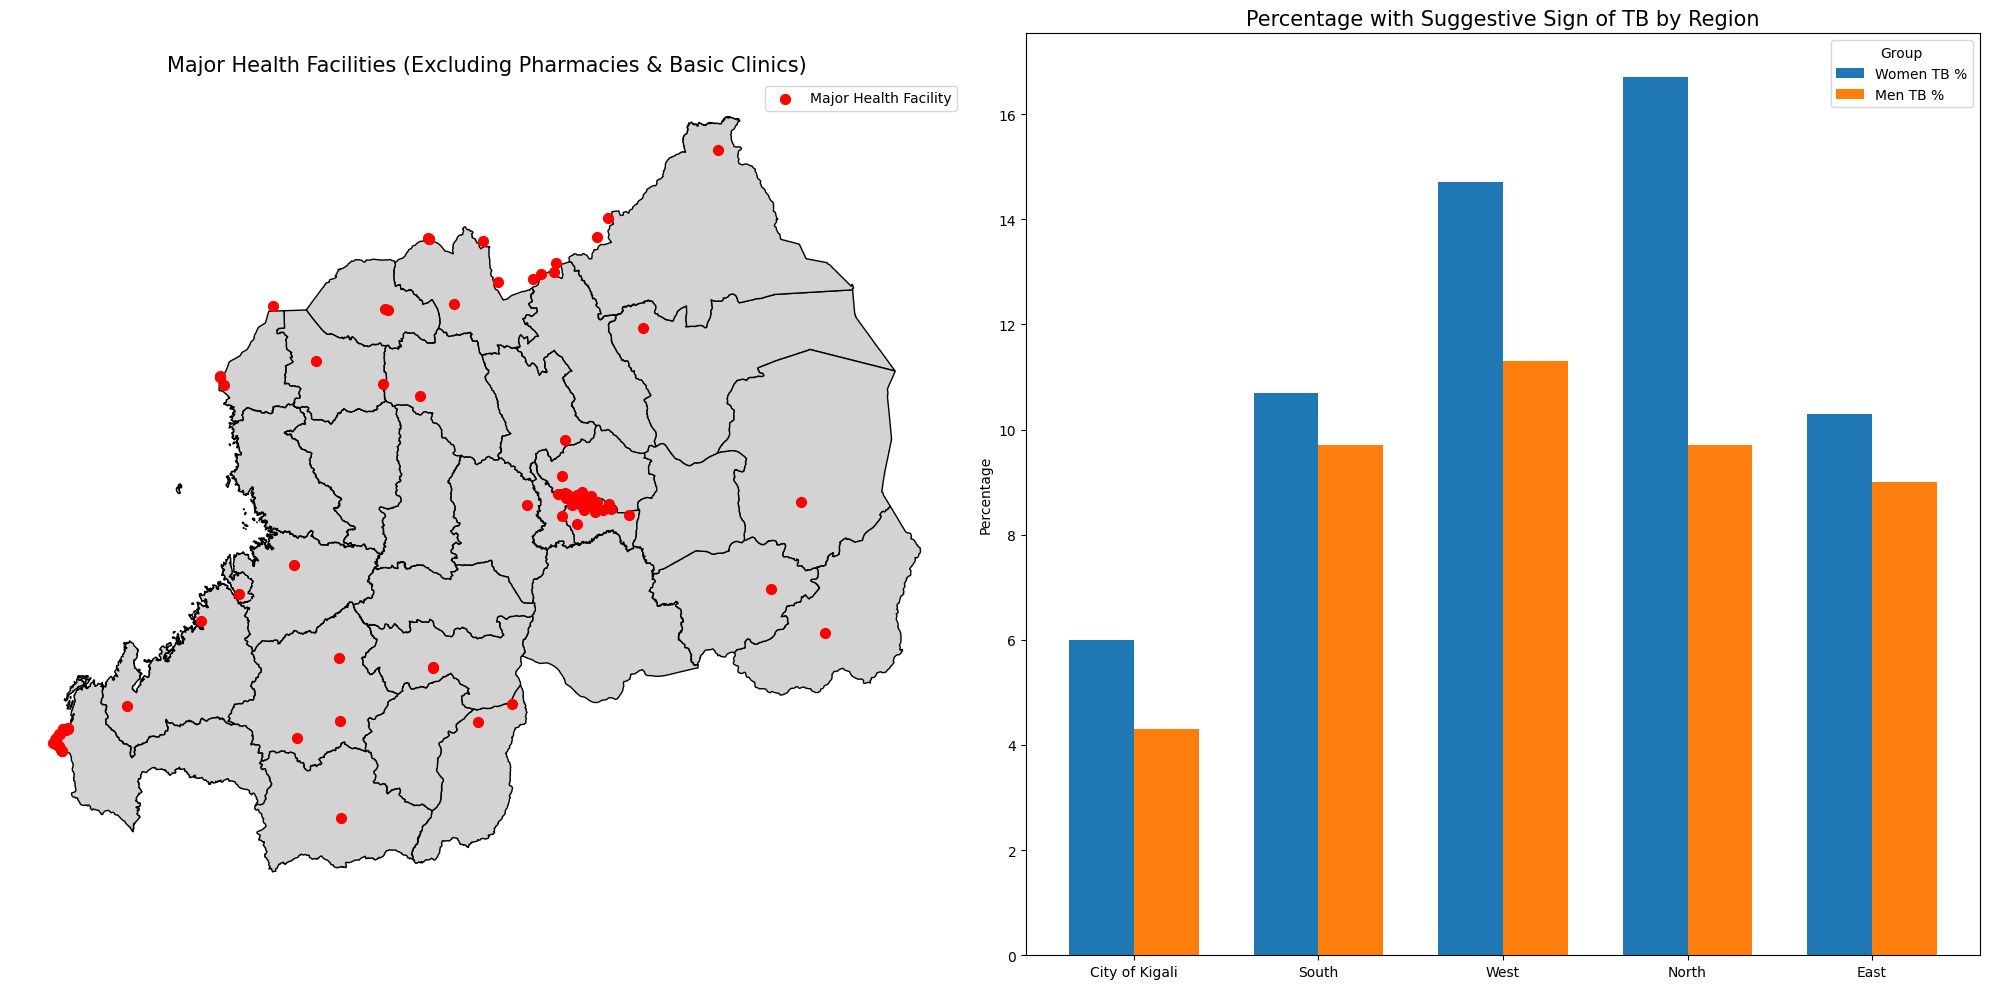

In [116]:

major_facilities = facilities[~facilities['amenity'].str.lower().isin(['pharmacy', 'basic clinic'])]

tb = pd.read_excel("tuberculosis.xlsx")
tb["Background characteristic"] = tb["Background characteristic"].str.strip()

regions = ["City of Kigali", "South", "West", "North", "East"]
tb_regions = tb[tb["Background characteristic"].isin(regions)].copy()

tb_regions["Women Percentage with suggestive sign of tuberculosis"] = pd.to_numeric(tb_regions["Women Percentage with suggestive sign of tuberculosis"], errors='coerce')
tb_regions["Men Percentage with suggestive sign of tuberculosis"] = pd.to_numeric(tb_regions["Men Percentage with suggestive sign of tuberculosis"], errors='coerce')

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

districts.plot(ax=axs[0], color="lightgrey", edgecolor="black")
major_facilities.plot(ax=axs[0], marker='o', color='red', markersize=50, label="Major Health Facility")
axs[0].set_title("Major Health Facilities (Excluding Pharmacies & Basic Clinics)", fontsize=15)
axs[0].axis('off')
axs[0].legend()

import numpy as np

x = np.arange(len(tb_regions))
width = 0.35
axs[1].bar(x - width/2, tb_regions["Women Percentage with suggestive sign of tuberculosis"], width, label="Women TB %")
axs[1].bar(x + width/2, tb_regions["Men Percentage with suggestive sign of tuberculosis"], width, label="Men TB %")
axs[1].set_xticks(x)
axs[1].set_xticklabels(tb_regions["Background characteristic"])
axs[1].set_ylabel("Percentage")
axs[1].set_title("Percentage with Suggestive Sign of TB by Region", fontsize=15)
axs[1].legend(title="Group")

plt.tight_layout()
plt.show()


   Province/City           Province 2022 Population District TB Cases  \
0         GASABO        KIGALI CITY         879,505              0.05   
1       KICUKIRO        KIGALI CITY         491,731              0.03   
2     NYARUGENGE        KIGALI CITY         374,319              0.02   
3       GISAGARA  SOUTHERN PROVINCE         397,051              0.03   
4           HUYE  SOUTHERN PROVINCE         381,900              0.03   
5        KAMONYI  SOUTHERN PROVINCE         450,849              0.03   
6        MUHANGA  SOUTHERN PROVINCE         358,433              0.02   
7      NYAMAGABE  SOUTHERN PROVINCE         371,501              0.03   
8         NYANZA  SOUTHERN PROVINCE         365,718              0.02   
9      NYARUGURU  SOUTHERN PROVINCE         318,126              0.02   
10       RUHANGO  SOUTHERN PROVINCE         359,121              0.02   
11       KARONGI   WESTERN PROVINCE         373,869              0.04   
12       NYABIHU   WESTERN PROVINCE         319,047

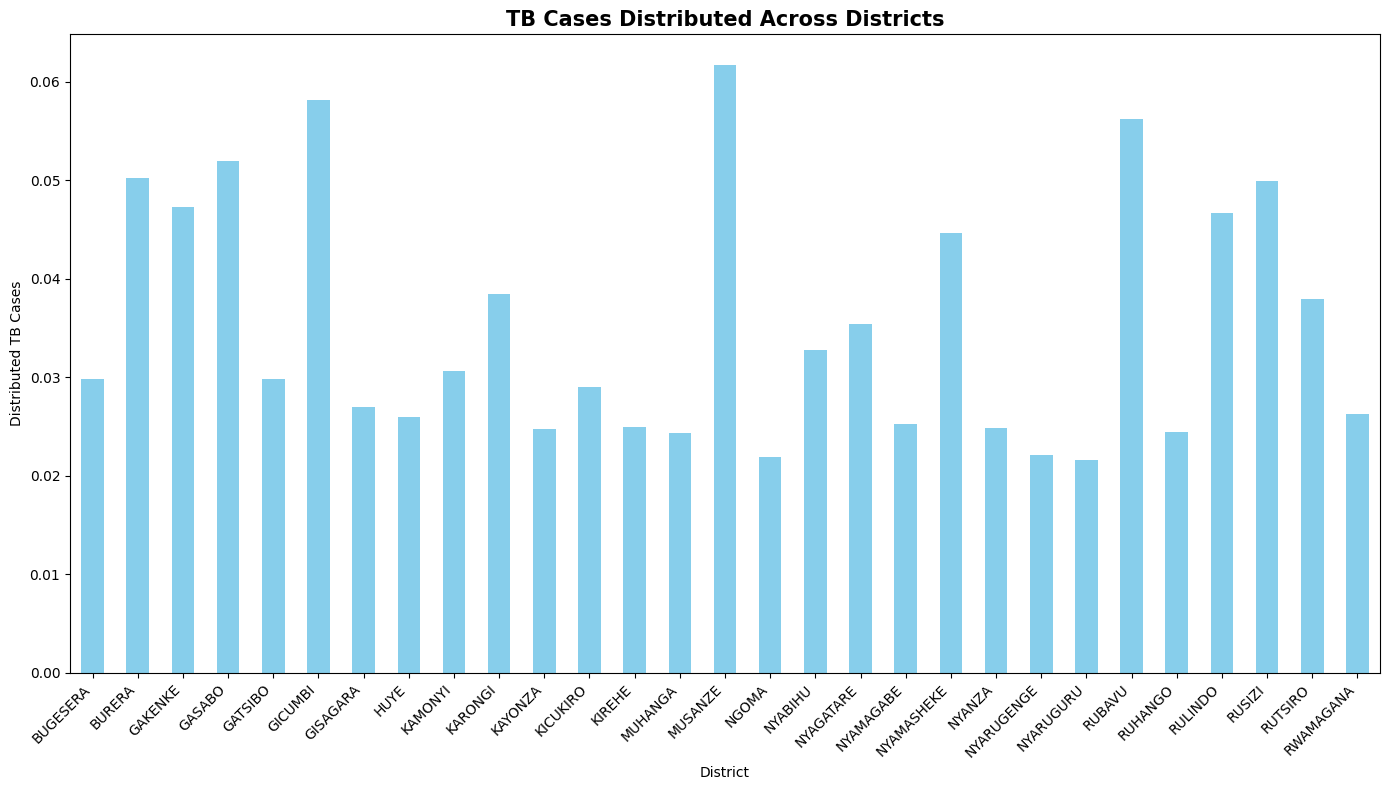

In [117]:

population_df = pd.read_excel("population_distribution.xlsx", engine="openpyxl")
population_df.columns = ['Province/City', 'District', '2002 Population', '2012 Population', '2022 Population']

for col in ['2002 Population', '2012 Population', '2022 Population']:
    population_df[col] = population_df[col].astype(str).str.replace(',', '').astype(int)

population_df['Province/City'] = population_df['Province/City'].str.strip().str.upper()

sectors = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
sectors['District'] = sectors['District'].str.strip().str.upper()
sectors['Province'] = sectors['Province'].str.strip().str.upper()

district_to_province_mapping = sectors[['District', 'Province']].drop_duplicates().set_index('District')['Province'].to_dict()

population_df['Province'] = population_df['Province/City'].map(district_to_province_mapping)

province_population = population_df.groupby('Province')['2022 Population'].sum().reset_index()
province_population.rename(columns={'2022 Population': 'Province Population'}, inplace=True)

population_df = population_df.merge(province_population, on='Province', how='left')

tb = pd.read_excel("tuberculosis.xlsx")
tb["Background characteristic"] = tb["Background characteristic"].str.strip().str.upper()

province_mapping = {
    'NORTH': 'NORTHERN PROVINCE',
    'SOUTH': 'SOUTHERN PROVINCE',
    'CITY OF KIGALI': 'KIGALI CITY',
    'WEST': 'WESTERN PROVINCE',
    'EAST': 'EASTERN PROVINCE'
}
tb['Background characteristic'] = tb['Background characteristic'].map(province_mapping)

tb = tb[tb['Background characteristic'].notna()].copy()

tb["Women Percentage with suggestive sign of tuberculosis"] = pd.to_numeric(
    tb["Women Percentage with suggestive sign of tuberculosis"], errors='coerce')
tb["Men Percentage with suggestive sign of tuberculosis"] = pd.to_numeric(
    tb["Men Percentage with suggestive sign of tuberculosis"], errors='coerce')

tb['Total TB Cases'] = (
    tb['Women Percentage with suggestive sign of tuberculosis'] +
    tb['Men Percentage with suggestive sign of tuberculosis']
) / 100  
tb = tb.merge(province_population, left_on='Background characteristic', right_on='Province', how='left')

merged_data = tb.merge(population_df, on='Province', how='left')

merged_data['District TB Cases'] = (
    merged_data['Total TB Cases'] * (merged_data['2022 Population'] / merged_data['Province Population_y'])
)

merged_data['TB Cases per 100,000'] = (merged_data['District TB Cases'] / merged_data['2022 Population']) * 100000

summary_table = merged_data[['Province/City', 'Province', '2022 Population', 'District TB Cases', 'TB Cases per 100,000']].copy()

summary_table['2022 Population'] = summary_table['2022 Population'].astype(int).apply(lambda x: f"{x:,}")
summary_table['District TB Cases'] = summary_table['District TB Cases'].apply(lambda x: f"{x:,.2f}")
summary_table['TB Cases per 100,000'] = summary_table['TB Cases per 100,000'].apply(lambda x: f"{x:,.2f}")

print(summary_table)

plt.figure(figsize=(14, 8))
merged_data.groupby('Province/City')['District TB Cases'].sum().plot(kind='bar', color='skyblue')
plt.title("TB Cases Distributed Across Districts", fontsize=15, weight='bold')
plt.ylabel("Distributed TB Cases")
plt.xlabel("District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [129]:

merged_data['Actual Women TB Cases'] = (
    merged_data['Women Percentage with suggestive sign of tuberculosis'] / 100
) * merged_data['2022 Population']

merged_data['Actual Men TB Cases'] = (
    merged_data['Men Percentage with suggestive sign of tuberculosis'] / 100
) * merged_data['2022 Population']

merged_data['Total Actual TB Cases'] = merged_data['Actual Women TB Cases'] + merged_data['Actual Men TB Cases']

merged_data

,Background characteristic,Women Percentage with suggestive sign of tuberculosis,Women Number,Women Percentage who sought care or help,Women Number with sign/symptom,Men Percentage with suggestive sign of tuberculosis,Men Number,Men Percentage who sought care or help,Men Number with sign/symptom,Total TB Cases,...,District,2002 Population,2012 Population,2022 Population,Province Population_y,District TB Cases,"TB Cases per 100,000",Actual Women TB Cases,Actual Men TB Cases,Total Actual TB Cases
14,WESTERN PROVINCE,14.7,2308,39.7,339,11.3,1148.0,36,130.0,0.260,...,District,292653,403662,546683,2528529.0,0.056214,0.010283,80362.401,61775.179,142137.580
15,WESTERN PROVINCE,14.7,2308,39.7,339,11.3,1148.0,36,130.0,0.260,...,District,331950,400858,485529,2528529.0,0.049925,0.010283,71372.763,54864.777,126237.540
27,EASTERN PROVINCE,10.3,4203,36.3,433,9.0,1574.0,36.1,156.0,0.193,...,District,255104,465855,653861,3563145.0,0.035417,0.005417,67347.683,58847.490,126195.173
20,NORTHERN PROVINCE,16.7,2226,41.1,371,9.7,886.0,37.4,86.0,0.264,...,District,307078,368267,476522,2038511.0,0.061713,0.012951,79579.174,46222.634,125801.808
19,NORTHERN PROVINCE,16.7,2226,41.1,371,9.7,886.0,37.4,86.0,0.264,...,District,359716,395606,448824,2038511.0,0.058126,0.012951,74953.608,43535.928,118489.536
13,WESTERN PROVINCE,14.7,2308,39.7,339,11.3,1148.0,36,130.0,0.260,...,District,325032,381804,434221,2528529.0,0.044649,0.010283,63830.487,49066.973,112897.460
23,EASTERN PROVINCE,10.3,4203,36.3,433,9.0,1574.0,36.1,156.0,0.193,...,District,283456,433020,551164,3563145.0,0.029854,0.005417,56769.892,49604.760,106374.652
22,EASTERN PROVINCE,10.3,4203,36.3,433,9.0,1574.0,36.1,156.0,0.193,...,District,266775,361914,551103,3563145.0,0.029851,0.005417,56763.609,49599.270,106362.879
17,NORTHERN PROVINCE,16.7,2226,41.1,371,9.7,886.0,37.4,86.0,0.264,...,District,320759,336582,387729,2038511.0,0.050213,0.012951,64750.743,37609.713,102360.456
11,WESTERN PROVINCE,14.7,2308,39.7,339,11.3,1148.0,36,130.0,0.260,...,District,278944,331808,373869,2528529.0,0.038444,0.010283,54958.743,42247.197,97205.940


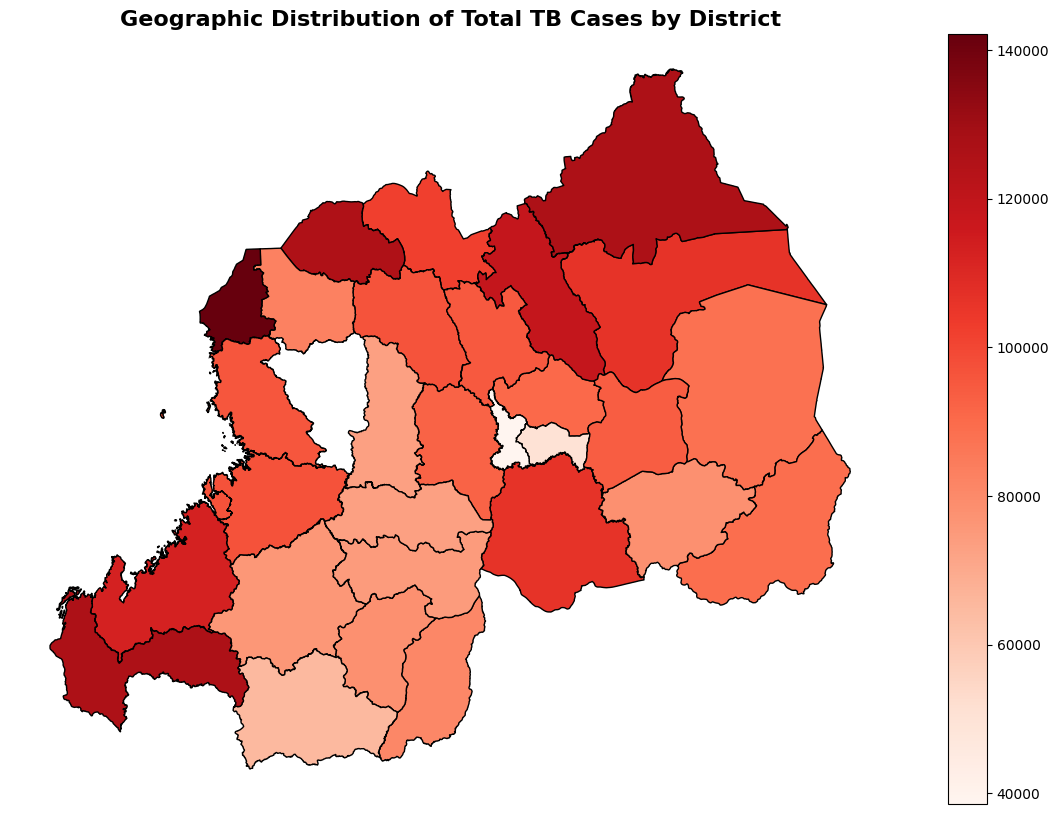

In [ ]:

districts = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
districts['District'] = districts['District'].str.strip().str.upper()

districts = sectors.dissolve(by='District', as_index=False)
final_shp_data = districts.merge(merged_data, left_on='District', right_on='Province/City', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

final_shp_data.plot(column='Total Actual TB Cases', ax=ax, cmap='Reds', legend=True, edgecolor='black')

plt.title("Geographic Distribution of Total TB Cases by District", fontsize=16, weight='bold')
plt.axis('off') 

for idx, row in final_shp_data.iterrows():
    if not pd.isna(row['Total Actual TB Cases']):  
        centroid = row['geometry'].centroid 
        tb_cases = int(row['Total Actual TB Cases'])
        label = f"{""}" 
        ax.annotate(label, xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=8, fontweight='bold', color='black')

plt.show()


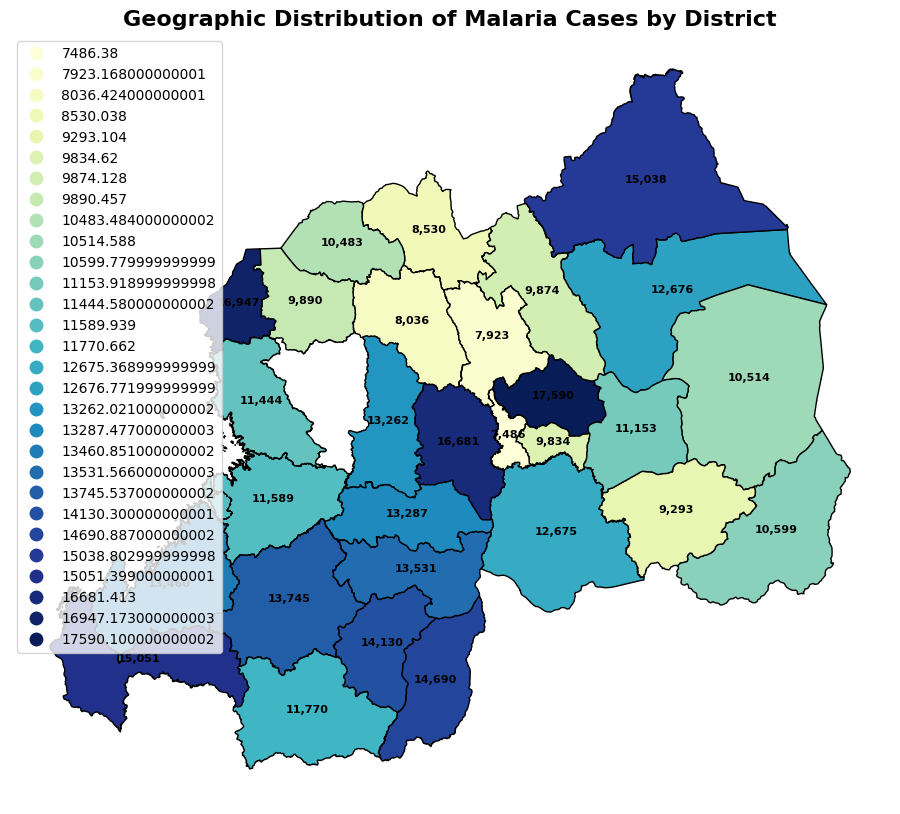

In [139]:

malaria_data = pd.read_excel("Malaria_Prevalence_Rwanda_DHS_2019-20.xlsx") 

province_malaria_data = malaria_data.loc[
    malaria_data["Background Characteristic"].isin(["City of Kigali", "South", "West", "North", "East"])
].copy()

province_malaria_data.rename(columns={
    "Background Characteristic": "Province",
    "Malaria Prevalence According to RDT (%)": "Malaria Prevalence (%)",
    "Number of Women (RDT)": "Number of Women"
}, inplace=True)


province_mapping = {
    "City of Kigali": "KIGALI CITY",
    "South": "SOUTHERN PROVINCE",
    "West": "WESTERN PROVINCE",
    "North": "NORTHERN PROVINCE",
    "East": "EASTERN PROVINCE"
}
province_malaria_data["Province"] = province_malaria_data["Province"].map(province_mapping)

population_df = pd.read_excel("population_distribution.xlsx", engine="openpyxl")
population_df.columns = ['Province/City', 'District', '2002 Population', '2012 Population', '2022 Population']

population_df['Province/City'] = population_df['Province/City'].str.strip().str.upper()
population_df['District'] = population_df['District'].str.strip().str.upper()

sectors = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
sectors['District'] = sectors['District'].str.strip().str.upper()
sectors['Province'] = sectors['Province'].str.strip().str.upper()

district_to_province_mapping = sectors[['District', 'Province']].drop_duplicates().set_index('District')['Province'].to_dict()
population_df['Province'] = population_df['Province/City'].map(district_to_province_mapping)

province_population = population_df.groupby('Province')['2022 Population'].sum().reset_index()
province_population.rename(columns={'2022 Population': 'Province Population'}, inplace=True)

malaria_merged = province_malaria_data.merge(province_population, on='Province', how='left')

population_df = population_df.merge(malaria_merged[['Province', 'Malaria prevalence according to RDT (%)']], on='Province', how='left')

province_population = population_df.groupby('Province')['2022 Population'].sum().reset_index()
province_population.rename(columns={'2022 Population': 'Province Population'}, inplace=True)

population_df = population_df.merge(province_population, on='Province', how='left')
population_df['District Malaria Cases'] = (
    (population_df['2022 Population'] / population_df['Province Population']) *
    (population_df['Malaria prevalence according to RDT (%)'] / 100 * population_df['Province Population'])
)


districts = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
districts['District'] = districts['District'].str.strip().str.upper()

districts = districts.dissolve(by='District', as_index=False)

final_shp_data = districts.merge(population_df, left_on='District', right_on='Province/City', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

final_shp_data.plot(column='District Malaria Cases', ax=ax, cmap='YlGnBu', legend=True, edgecolor='black')

plt.title("Geographic Distribution of Malaria Cases by District", fontsize=16, weight='bold')
plt.axis('off')  
for idx, row in final_shp_data.iterrows():
    if not pd.isna(row['District Malaria Cases']):  
        centroid = row['geometry'].centroid 
        malaria_cases = int(row['District Malaria Cases']) 
        label = f"{malaria_cases:,}"
        ax.annotate(label, xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=8, fontweight='bold', color='black')

plt.show()


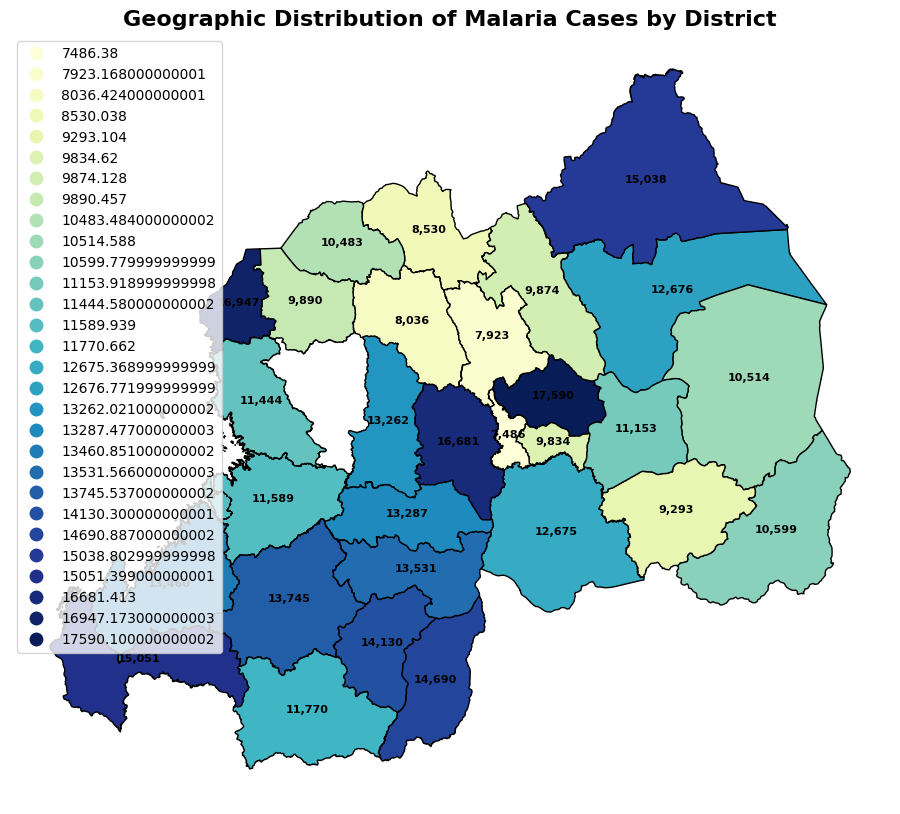

In [ ]:

districts = gpd.read_file("province_sector_shapefile/rwa_sector/Sector.shp")
districts['District'] = districts['District'].str.strip().str.upper()

districts = districts.dissolve(by='District', as_index=False)

final_shp_data = districts.merge(population_df, left_on='District', right_on='Province/City', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

final_shp_data.plot(column='District Malaria Cases', ax=ax, cmap='YlGnBu', legend=True, edgecolor='black')

plt.title("Geographic Distribution of Malaria Cases by District", fontsize=16, weight='bold')
plt.axis('off')  
for idx, row in final_shp_data.iterrows():
    if not pd.isna(row['District Malaria Cases']):  
        centroid = row['geometry'].centroid 
        malaria_cases = int(row['District Malaria Cases']) 
        label = f"{malaria_cases:,}"
        ax.annotate(label, xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=8, fontweight='bold', color='black')

plt.show()
